In [52]:
import pandas as pd
import pyfolio
import os


In [2]:
def process_returns(data: pd.DataFrame):
    """
    Computes the action adjusted returns, cumulated action adjusted returns and cumulated action
    adjusted returns percentage
    :param data: pandas dataframe containing the active, return and action columns
    :return: pandas dataframe containing the action adjusted returns, cumulated action adjusted returns and cumulated action
    adjusted returns percentage columns
    """
    df = data.copy()
    df = df.fillna(0.0)
    if 'action' in df.columns:
        df['action_adj_returns'] = df.Return * df.action
    else:
        df['action_adj_returns'] = df.Return
    df.loc[df.index[0], 'action_adj_returns'] = 1.0
    df['cumulated_returns'] = df.action_adj_returns.cumsum()
    df['cumulated_returns_pct'] = df['cumulated_returns'].pct_change(1)
    df = df.fillna(0.0)
    return df

In [3]:
def get_returns(indicators_filename: str, train_filename: str, test_filename: str):
    """
    Loads and processes the returns
    :indicators_filename: string containing path to the specified indicator dataset
    :train_filename: string containing path to the specified train prediction dataset
    :train_filename: string containing path to the specified test prediction dataset
    :return: two pandas dataframe containing the benchmark and the predicted returns
    """
    indicators = pd.read_pickle(indicators_filename)
    indicators = indicators.set_index('date')
    indicators = indicators.drop(indicators.columns[1:], axis=1)
    returns = process_returns(indicators)

    train_returns = pd.read_pickle(train_filename)
    test_returns = pd.read_pickle(test_filename)
    returns_pred = pd.concat([train_returns, test_returns], axis=0)
    returns_pred = returns_pred.rename(columns={'return': 'Return'})
    returns_pred = process_returns(returns_pred)
    
    return returns, returns_pred

# Bond1 Tear Sheet

In [4]:
bond1_indicators_filename = 'Data/ml_bond1_indicators.pkl'
bond1_train_filename = 'Data/train_bond1_prediction.pkl'
bond1_test_filename = 'Data/test_bond1_prediction.pkl'

bond1_returns, bond1_returns_pred = get_returns(bond1_indicators_filename, bond1_train_filename, bond1_test_filename)


In [5]:
bond1_pred_sharpe_ratio = bond1_returns_pred.cumulated_returns_pct.mean() / bond1_returns_pred.cumulated_returns_pct.std()
annualised_bond1_pred_sharpe_ratio = 252**0.5 * bond1_pred_sharpe_ratio

bond1_sharpe_ratio = bond1_returns.cumulated_returns_pct.mean() / bond1_returns.cumulated_returns_pct.std()
annualised_bond1_sharpe_ratio = 252**0.5 * bond1_sharpe_ratio


In [6]:
print('bond1_sharpe_ratio:\n{}'.format(bond1_sharpe_ratio))
print('bond1_pred_sharpe_ratio:\n{}\n'.format(bond1_pred_sharpe_ratio))

print('annualised_bond1_sharpe_ratio:\n{}'.format(annualised_bond1_sharpe_ratio))
print('annualised_bond1_pred_sharpe_ratio:\n{}'.format(annualised_bond1_pred_sharpe_ratio))


bond1_sharpe_ratio:
0.02379910073908774
bond1_pred_sharpe_ratio:
0.13954789200268822

annualised_bond1_sharpe_ratio:
0.37779901189559795
annualised_bond1_pred_sharpe_ratio:
2.2152541093344738


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 180


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           49.4%
Cumulative returns   42327.8%
Annual volatility       18.8%
Sharpe ratio             2.22
Calmar ratio              NaN
Stability                0.94
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    23.82
Kurtosis               723.37
Tail ratio                inf
Daily value at risk     -2.2%
Alpha                    0.51
Beta                      0.0

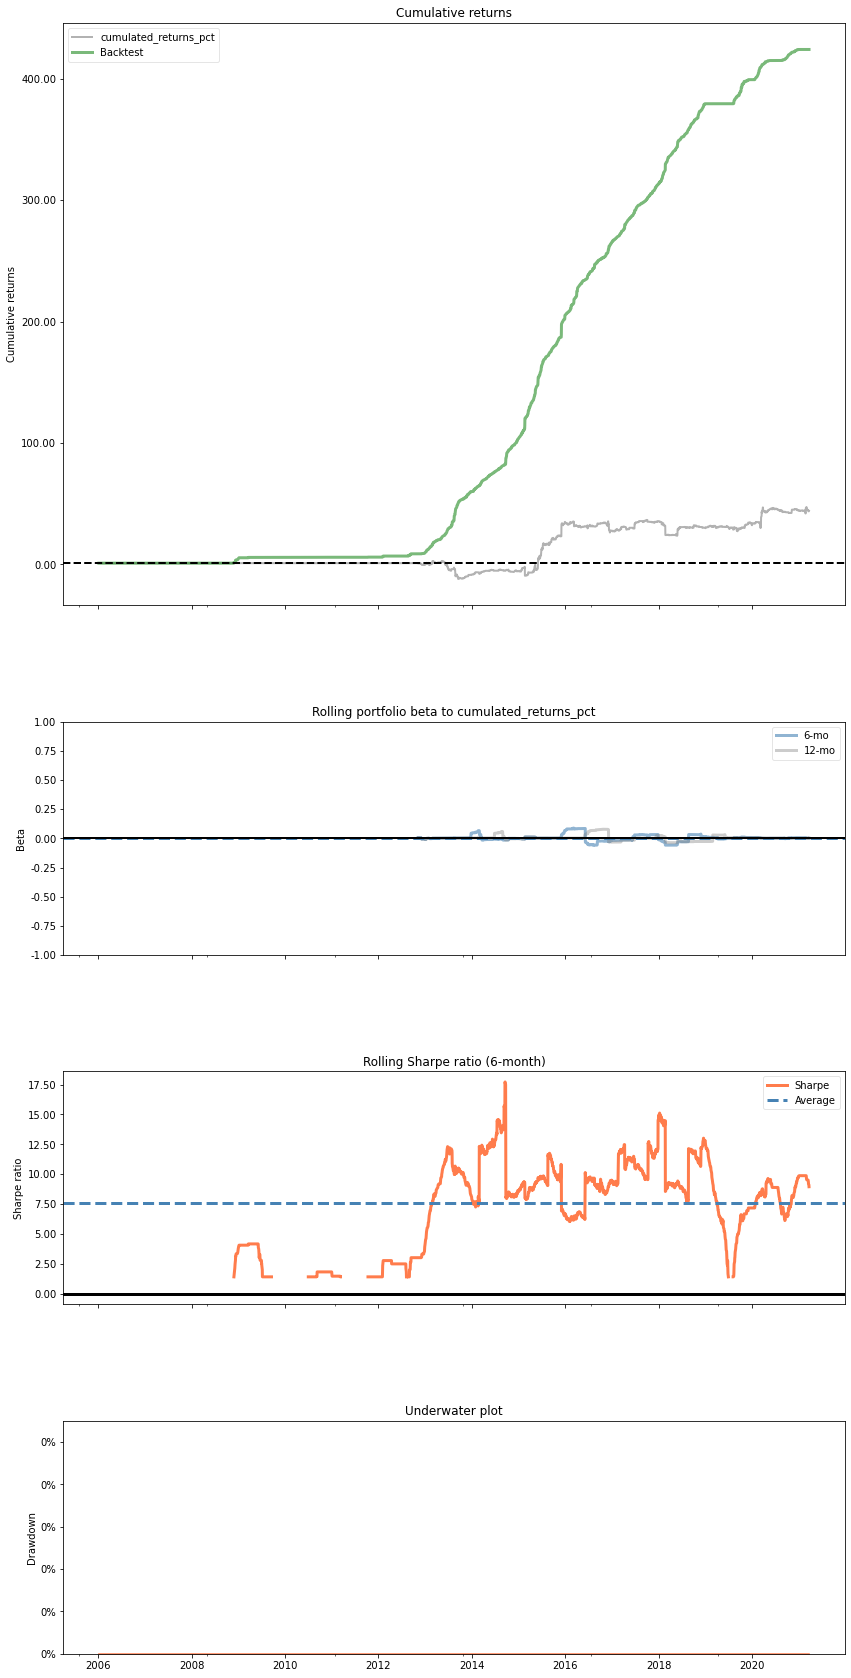

In [7]:
pyfolio.create_simple_tear_sheet(bond1_returns_pred.cumulated_returns_pct, benchmark_rets=bond1_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 180


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Backtest
Annual return          28.6%
Cumulative returns   4313.3%
Annual volatility     490.0%
Sharpe ratio            0.38
Calmar ratio            0.05
Stability                NaN
Max drawdown         -528.6%
Omega ratio             1.82
Sortino ratio           0.96
Skew                   22.64
Kurtosis              878.81
Tail ratio              0.99
Daily value at risk   -61.0%
Alpha                    0.0
Beta                     1.0

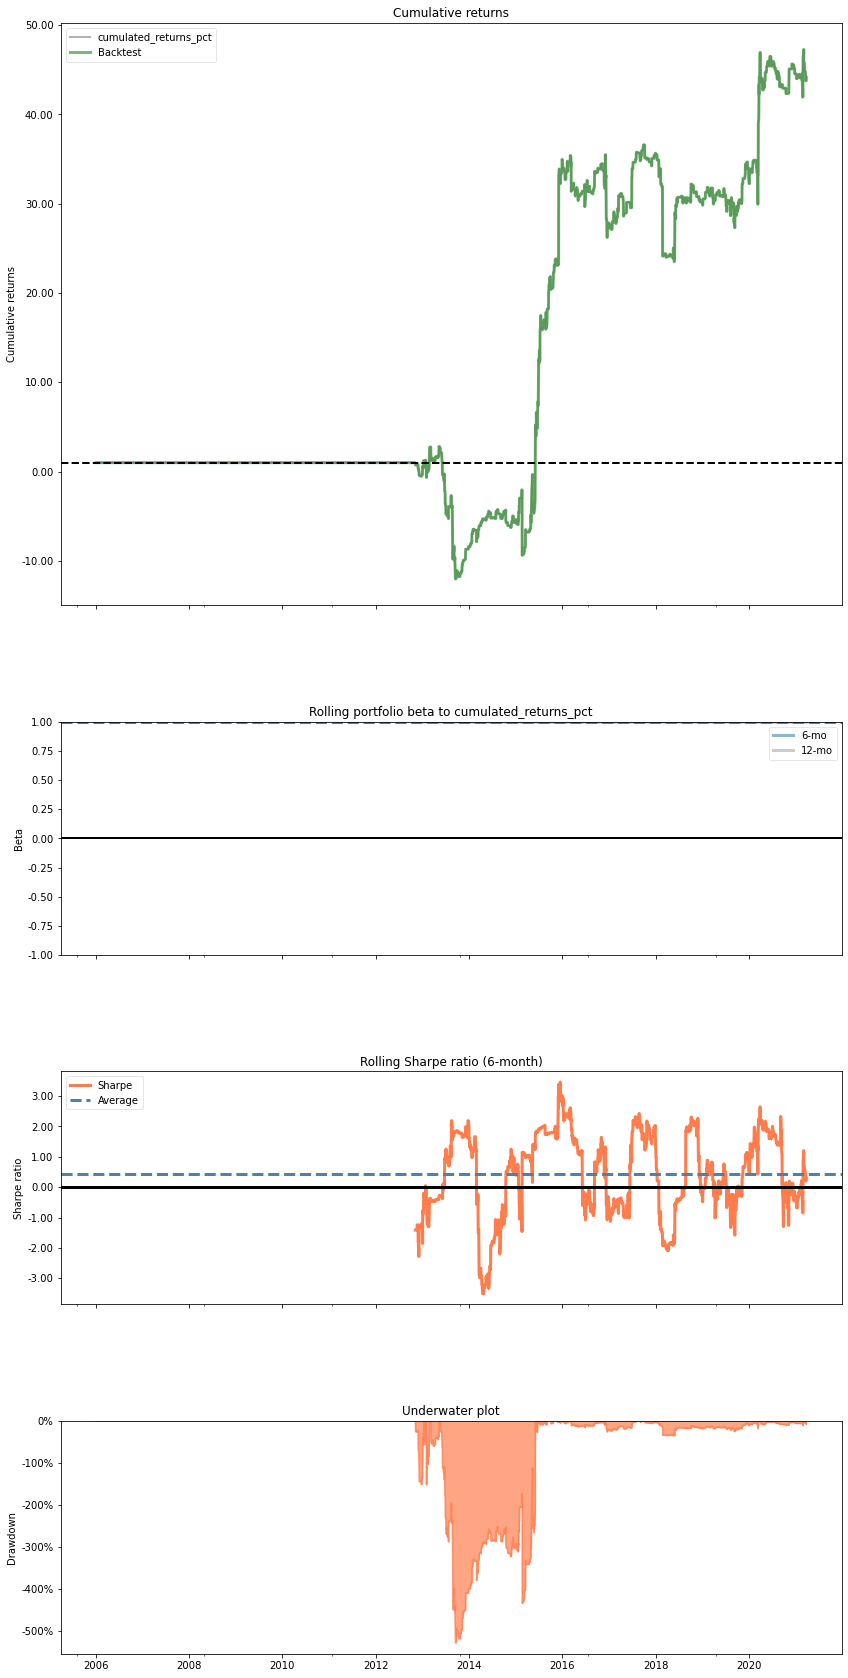

In [75]:
pyfolio.create_simple_tear_sheet(bond1_returns.cumulated_returns_pct, benchmark_rets=bond1_returns.cumulated_returns_pct)


# Bond2 Tear Sheet

In [8]:
bond2_indicators_filename = 'Data/ml_bond2_indicators.pkl'
bond2_train_filename = 'Data/train_bond2_prediction.pkl'
bond2_test_filename = 'Data/test_bond2_prediction.pkl'

bond2_returns, bond2_returns_pred = get_returns(bond2_indicators_filename, bond2_train_filename, bond2_test_filename)


In [9]:
bond2_pred_sharpe_ratio = bond2_returns_pred.cumulated_returns_pct.mean() / bond2_returns_pred.cumulated_returns_pct.std()
annualised_bond2_pred_sharpe_ratio = 252**0.5 * bond2_pred_sharpe_ratio

bond2_sharpe_ratio = bond2_returns.cumulated_returns_pct.mean() / bond2_returns.cumulated_returns_pct.std()
annualised_bond2_sharpe_ratio = 252**0.5 * bond2_sharpe_ratio


In [10]:
print('bond2_sharpe_ratio:\n{}'.format(bond2_sharpe_ratio))
print('bond2_pred_sharpe_ratio:\n{}\n'.format(bond2_pred_sharpe_ratio))

print('annualised_bond2_sharpe_ratio:\n{}'.format(annualised_bond2_sharpe_ratio))
print('annualised_bond2_pred_sharpe_ratio:\n{}'.format(annualised_bond2_pred_sharpe_ratio))


bond2_sharpe_ratio:
-0.012866577484597975
bond2_pred_sharpe_ratio:
0.12768298820792148

annualised_bond2_sharpe_ratio:
-0.20425058549273542
annualised_bond2_pred_sharpe_ratio:
2.026904600710518


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           48.7%
Cumulative returns   40219.8%
Annual volatility       20.4%
Sharpe ratio             2.03
Calmar ratio              NaN
Stability                0.51
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    27.24
Kurtosis               916.05
Tail ratio                inf
Daily value at risk     -2.4%
Alpha                     0.5
Beta                     -0.0

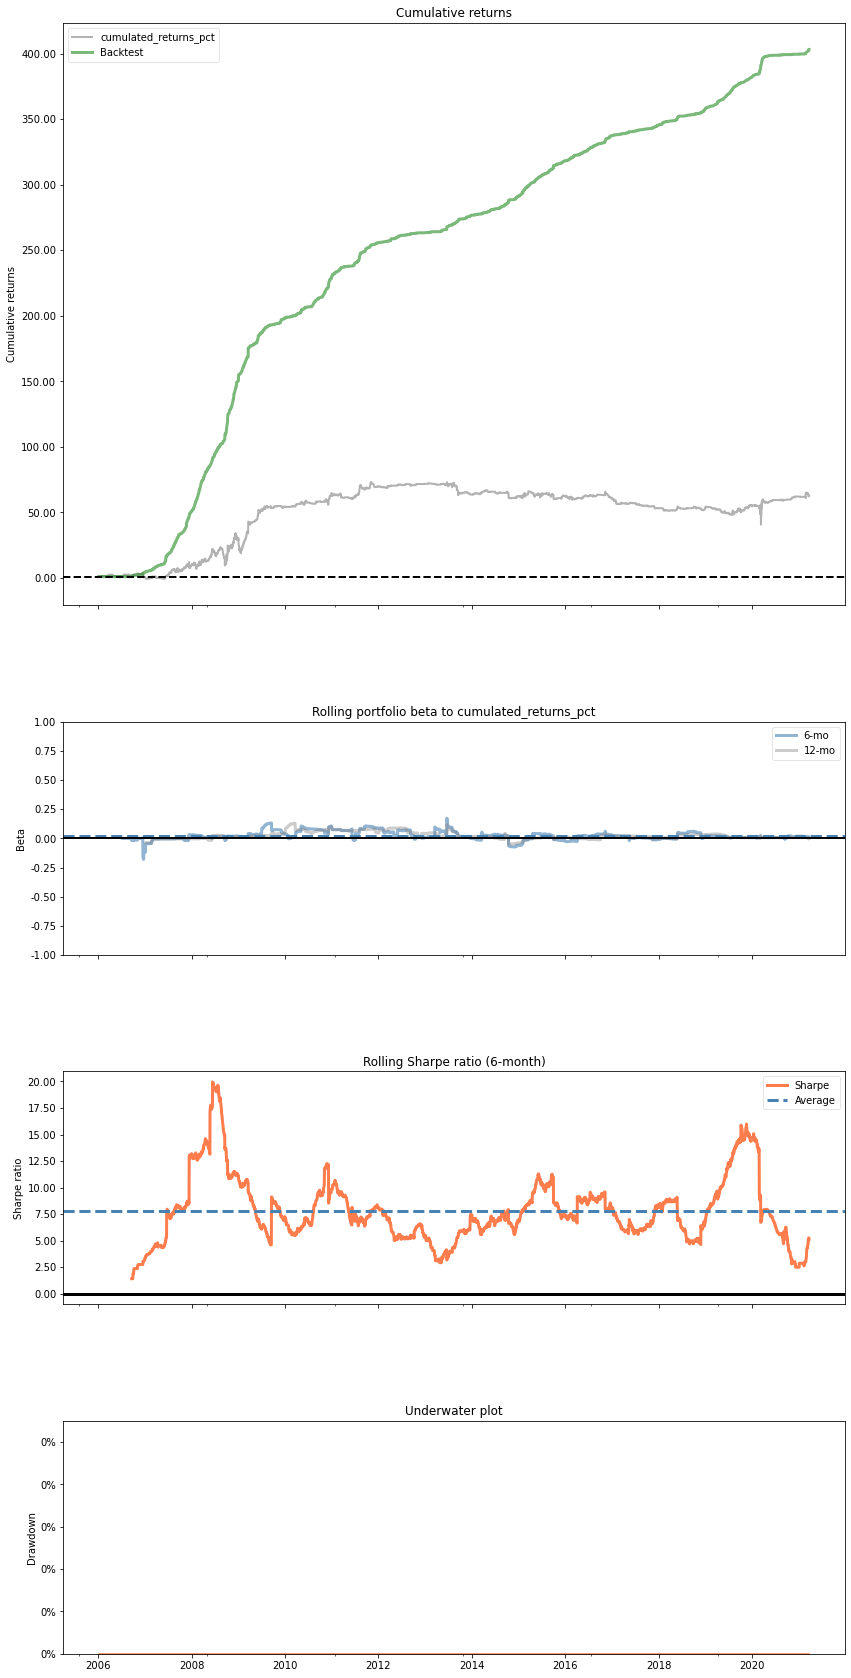

In [11]:
pyfolio.create_simple_tear_sheet(bond2_returns_pred.cumulated_returns_pct, benchmark_rets=bond2_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Backtest
Annual return          31.5%
Cumulative returns   6174.0%
Annual volatility     656.5%
Sharpe ratio            -0.2
Calmar ratio            0.26
Stability                NaN
Max drawdown         -121.7%
Omega ratio             0.68
Sortino ratio          -0.22
Skew                  -37.93
Kurtosis             2060.12
Tail ratio              1.57
Daily value at risk   -83.2%
Alpha                    0.0
Beta                     1.0

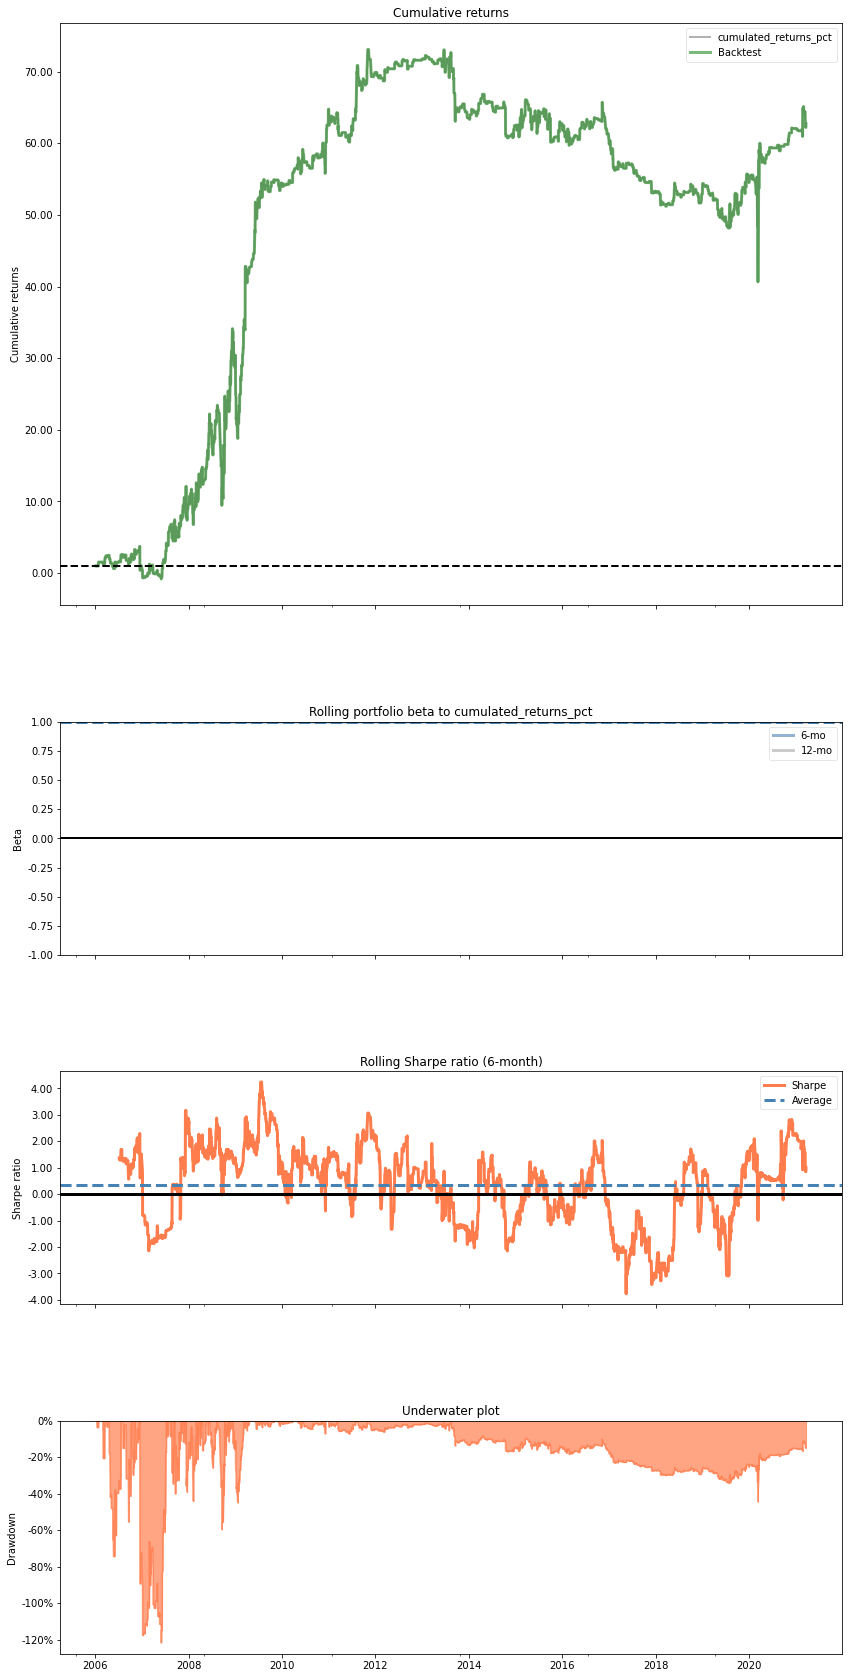

In [74]:
pyfolio.create_simple_tear_sheet(bond2_returns.cumulated_returns_pct, benchmark_rets=bond2_returns.cumulated_returns_pct)


# Commodity1 Tear Sheet

In [24]:
commodity1_indicators_filename = 'Data/ml_commodity1_indicators.pkl'
commodity1_train_filename = 'Data/train_commodity1_prediction.pkl'
commodity1_test_filename = 'Data/test_commodity1_prediction.pkl'

commodity1_returns, commodity1_returns_pred = get_returns(commodity1_indicators_filename, commodity1_train_filename, commodity1_test_filename)


In [25]:
commodity1_pred_sharpe_ratio = commodity1_returns_pred.cumulated_returns_pct.mean() / commodity1_returns_pred.cumulated_returns_pct.std()
annualised_commodity1_pred_sharpe_ratio = 252**0.5 * commodity1_pred_sharpe_ratio

commodity1_sharpe_ratio = commodity1_returns.cumulated_returns_pct.mean() / commodity1_returns.cumulated_returns_pct.std()
annualised_commodity1_sharpe_ratio = 252**0.5 * commodity1_sharpe_ratio


In [26]:
print('commodity1_sharpe_ratio:\n{}'.format(commodity1_sharpe_ratio))
print('commodity1_pred_sharpe_ratio:\n{}\n'.format(commodity1_pred_sharpe_ratio))

print('annualised_commodity1_sharpe_ratio:\n{}'.format(annualised_commodity1_sharpe_ratio))
print('annualised_commodity1_pred_sharpe_ratio:\n{}'.format(annualised_commodity1_pred_sharpe_ratio))


commodity1_sharpe_ratio:
0.021731350295549137
commodity1_pred_sharpe_ratio:
0.2149435201311213

annualised_commodity1_sharpe_ratio:
0.34497449121391804
annualised_commodity1_pred_sharpe_ratio:
3.412122601150515


Entire data start date: 2006-01-04
Entire data end date: 2021-03-24
Backtest months: 182


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           50.9%
Cumulative returns   51368.4%
Annual volatility       12.3%
Sharpe ratio             3.41
Calmar ratio              NaN
Stability                0.58
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    12.81
Kurtosis               262.11
Tail ratio                inf
Daily value at risk     -1.4%
Alpha                    0.53
Beta                    -0.01

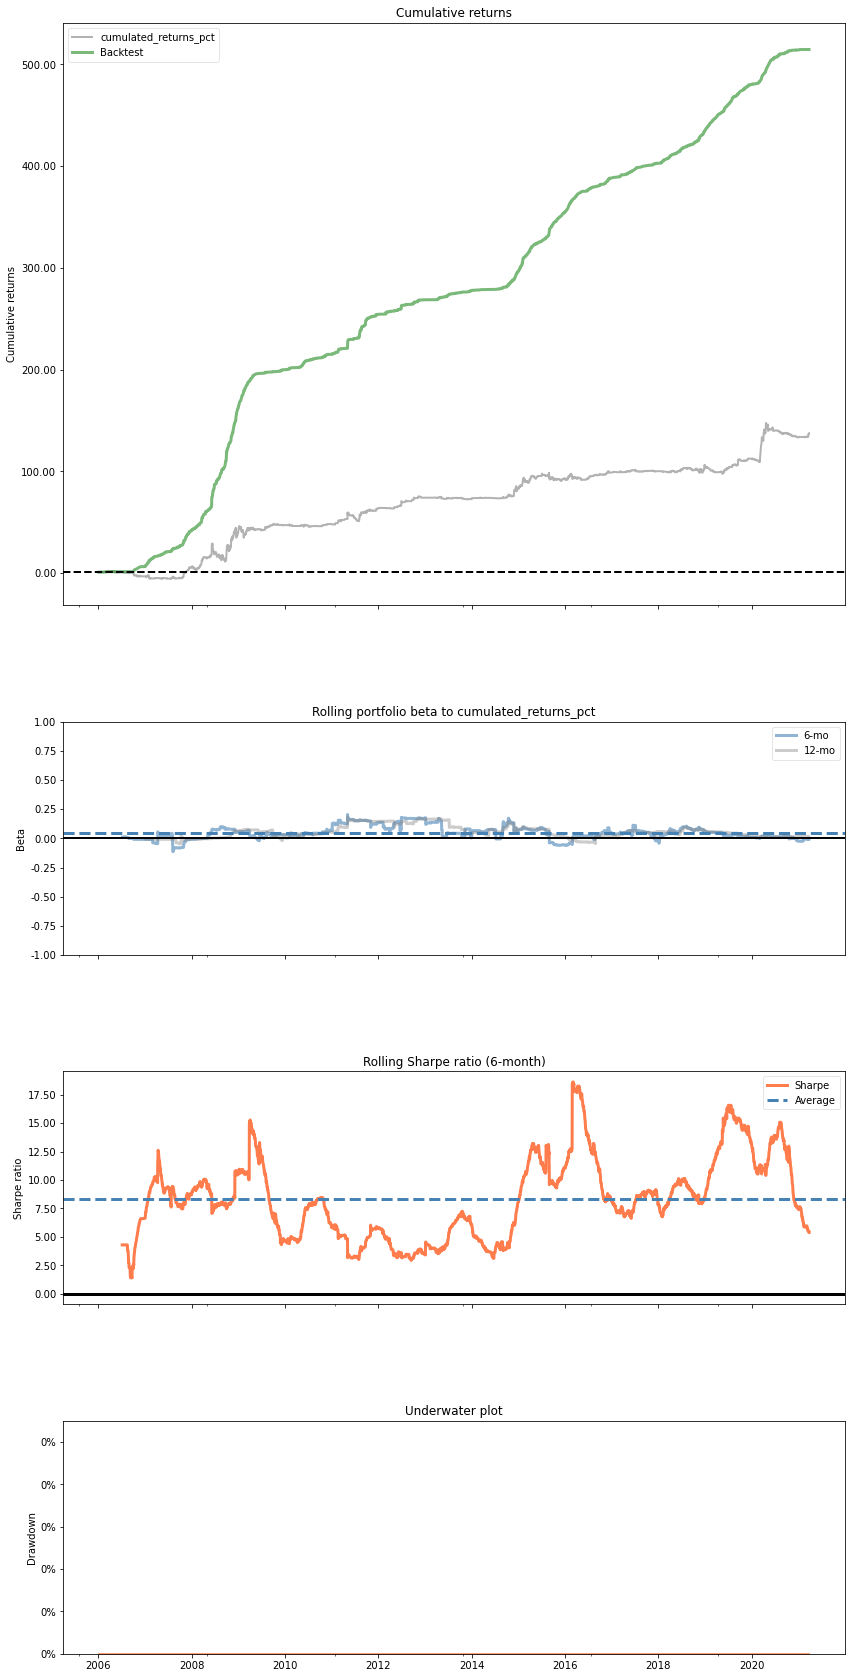

In [30]:
commodity1_returns = commodity1_returns[~commodity1_returns.index.duplicated(keep='first')]
pyfolio.create_simple_tear_sheet(commodity1_returns_pred.cumulated_returns_pct, benchmark_rets=commodity1_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-24
Backtest months: 182


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Backtest
Annual return           38.4%
Cumulative returns   13657.7%
Annual volatility      258.4%
Sharpe ratio             0.34
Calmar ratio              0.1
Stability                 NaN
Max drawdown          -397.3%
Omega ratio              1.61
Sortino ratio            0.83
Skew                    35.56
Kurtosis              2000.74
Tail ratio               1.82
Daily value at risk    -32.2%
Alpha                     0.0
Beta                      1.0

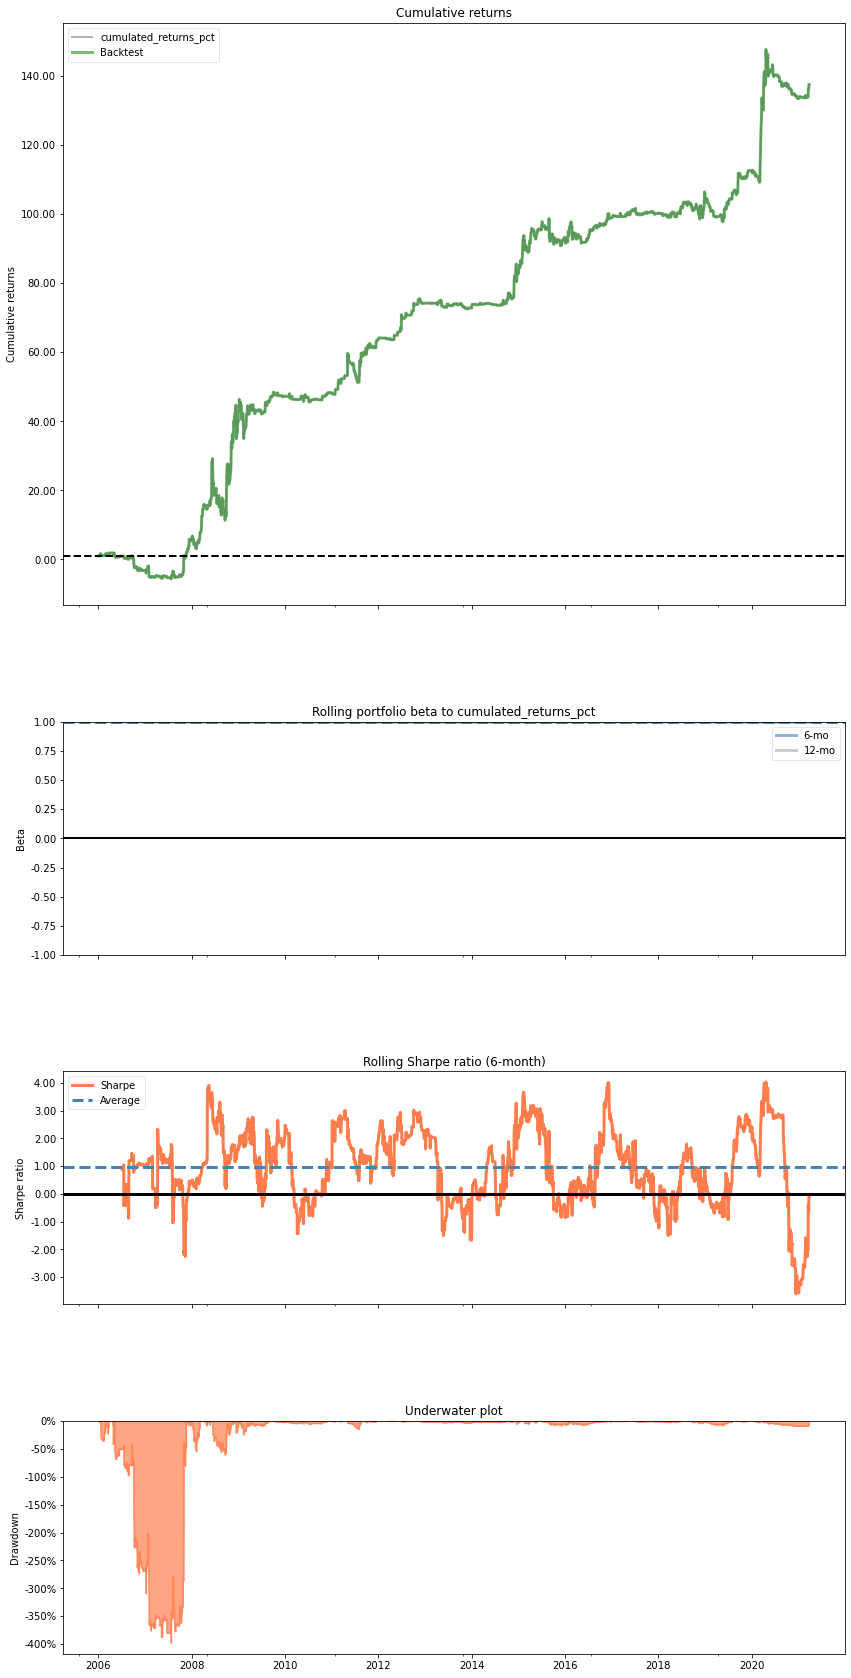

In [73]:
pyfolio.create_simple_tear_sheet(commodity1_returns.cumulated_returns_pct, benchmark_rets=commodity1_returns.cumulated_returns_pct)


# Commodity2 Tear Sheet

In [31]:
commodity2_indicators_filename = 'Data/ml_commodity2_indicators.pkl'
commodity2_train_filename = 'Data/train_commodity2_prediction.pkl'
commodity2_test_filename = 'Data/test_commodity2_prediction.pkl'

commodity2_returns, commodity2_returns_pred = get_returns(commodity2_indicators_filename, commodity2_train_filename, commodity2_test_filename)


In [32]:
commodity2_pred_sharpe_ratio = commodity2_returns_pred.cumulated_returns_pct.mean() / commodity2_returns_pred.cumulated_returns_pct.std()
annualised_commodity2_pred_sharpe_ratio = 252**0.5 * commodity2_pred_sharpe_ratio

commodity2_sharpe_ratio = commodity2_returns.cumulated_returns_pct.mean() / commodity2_returns.cumulated_returns_pct.std()
annualised_commodity2_sharpe_ratio = 252**0.5 * commodity2_sharpe_ratio


In [33]:
print('commodity2_sharpe_ratio:\n{}'.format(commodity2_sharpe_ratio))
print('commodity2_pred_sharpe_ratio:\n{}\n'.format(commodity2_pred_sharpe_ratio))

print('annualised_commodity2_sharpe_ratio:\n{}'.format(annualised_commodity2_sharpe_ratio))
print('annualised_commodity2_pred_sharpe_ratio:\n{}'.format(annualised_commodity2_pred_sharpe_ratio))


commodity2_sharpe_ratio:
0.05213863346066141
commodity2_pred_sharpe_ratio:
0.18508446288652317

annualised_commodity2_sharpe_ratio:
0.8276751470139664
annualised_commodity2_pred_sharpe_ratio:
2.9381247620382256


Entire data start date: 2006-01-04
Entire data end date: 2021-03-18
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           48.0%
Cumulative returns   37551.4%
Annual volatility       13.6%
Sharpe ratio             2.94
Calmar ratio              NaN
Stability                0.76
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    14.43
Kurtosis                296.1
Tail ratio                inf
Daily value at risk     -1.6%
Alpha                    0.44
Beta                     0.09

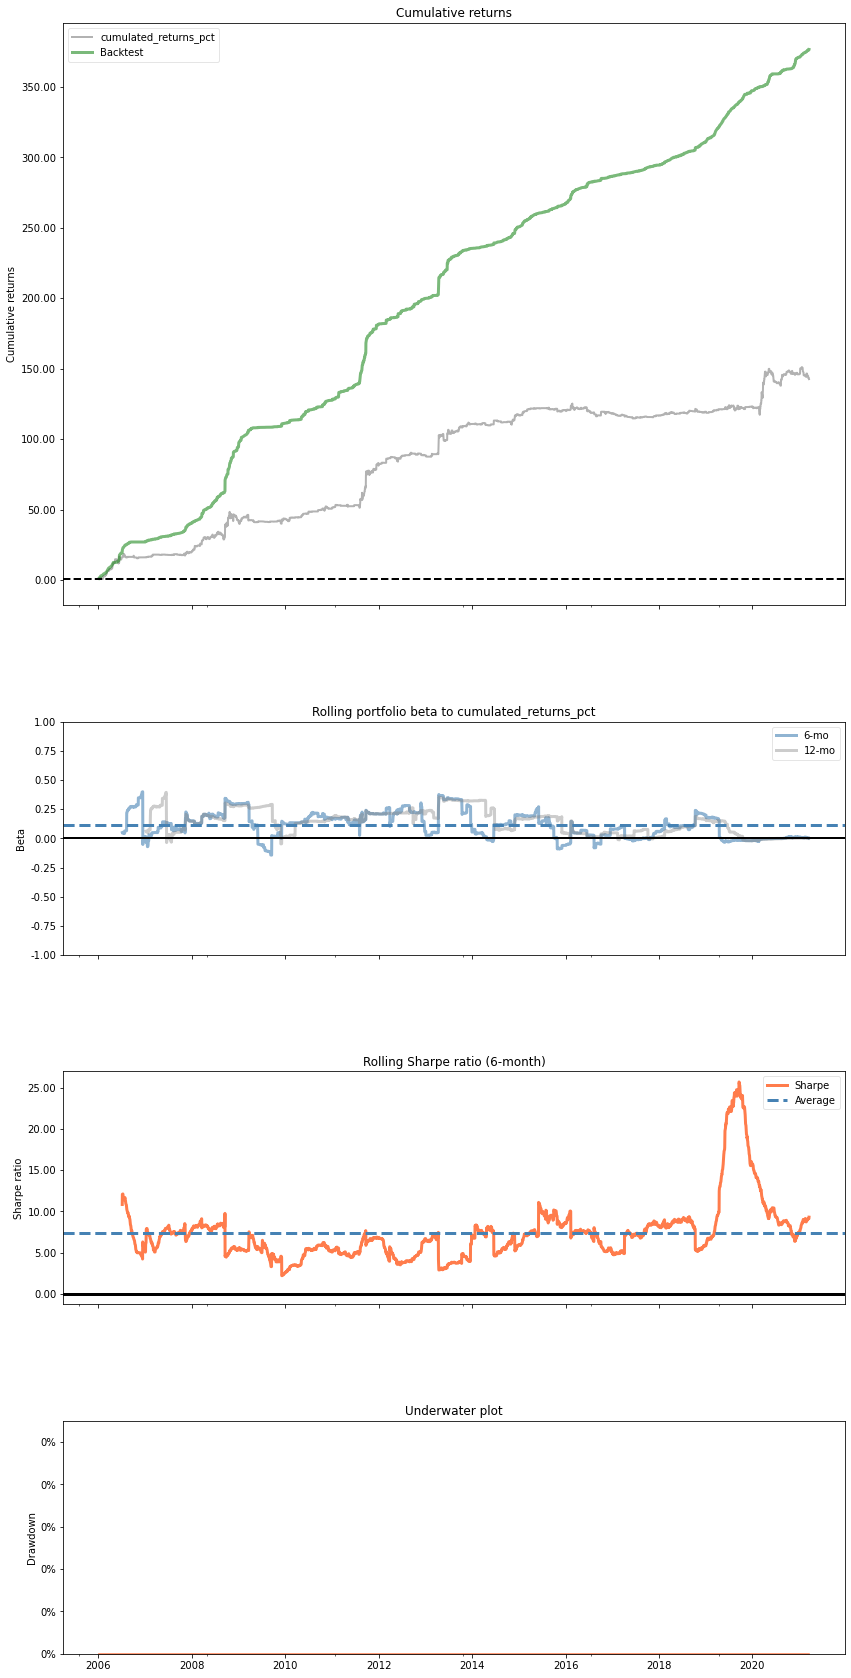

In [34]:
commodity2_returns = commodity2_returns[~commodity2_returns.index.duplicated(keep='first')]
pyfolio.create_simple_tear_sheet(commodity2_returns_pred.cumulated_returns_pct, benchmark_rets=commodity2_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-18
Backtest months: 181


Backtest
Annual return           38.8%
Cumulative returns   14163.8%
Annual volatility       51.1%
Sharpe ratio             0.83
Calmar ratio             0.69
Stability                0.75
Max drawdown           -56.6%
Omega ratio              2.25
Sortino ratio            2.38
Skew                    29.41
Kurtosis              1425.08
Tail ratio               1.86
Daily value at risk     -6.3%
Alpha                     0.0
Beta                      1.0

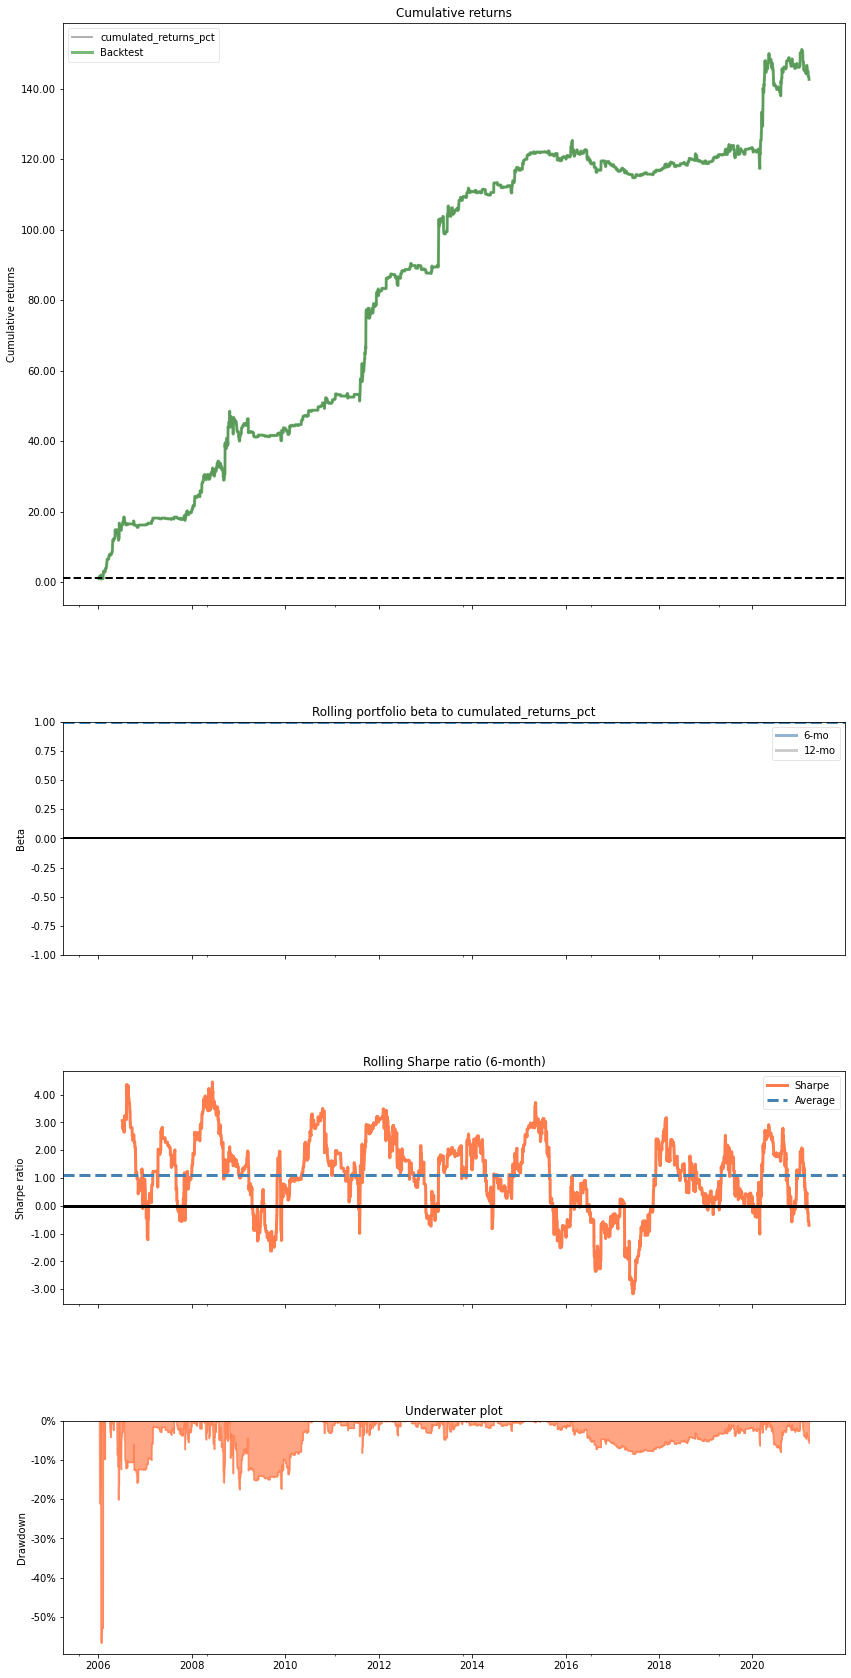

In [72]:
pyfolio.create_simple_tear_sheet(commodity2_returns.cumulated_returns_pct, benchmark_rets=commodity2_returns.cumulated_returns_pct)


# Currency1 Tear Sheet

In [36]:
currency1_indicators_filename = 'Data/ml_currency1_indicators.pkl'
currency1_train_filename = 'Data/train_currency1_prediction.pkl'
currency1_test_filename = 'Data/test_currency1_prediction.pkl'

currency1_returns, currency1_returns_pred = get_returns(currency1_indicators_filename, currency1_train_filename, currency1_test_filename)


In [37]:
currency1_pred_sharpe_ratio = currency1_returns_pred.cumulated_returns_pct.mean() / currency1_returns_pred.cumulated_returns_pct.std()
annualised_currency1_pred_sharpe_ratio = 252**0.5 * currency1_pred_sharpe_ratio

currency1_sharpe_ratio = currency1_returns.cumulated_returns_pct.mean() / currency1_returns.cumulated_returns_pct.std()
annualised_currency1_sharpe_ratio = 252**0.5 * currency1_sharpe_ratio


In [38]:
print('currency1_sharpe_ratio:\n{}'.format(currency1_sharpe_ratio))
print('currency1_pred_sharpe_ratio:\n{}\n'.format(currency1_pred_sharpe_ratio))

print('annualised_currency1_sharpe_ratio:\n{}'.format(annualised_currency1_sharpe_ratio))
print('annualised_currency1_pred_sharpe_ratio:\n{}'.format(annualised_currency1_pred_sharpe_ratio))


currency1_sharpe_ratio:
0.016318438786211125
currency1_pred_sharpe_ratio:
0.22354026258823576

annualised_currency1_sharpe_ratio:
0.2590471848788721
annualised_currency1_pred_sharpe_ratio:
3.548591656911286


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           50.8%
Cumulative returns   49972.3%
Annual volatility       11.8%
Sharpe ratio             3.55
Calmar ratio              NaN
Stability                0.64
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    10.81
Kurtosis               171.92
Tail ratio                inf
Daily value at risk     -1.3%
Alpha                    0.52
Beta                     -0.0

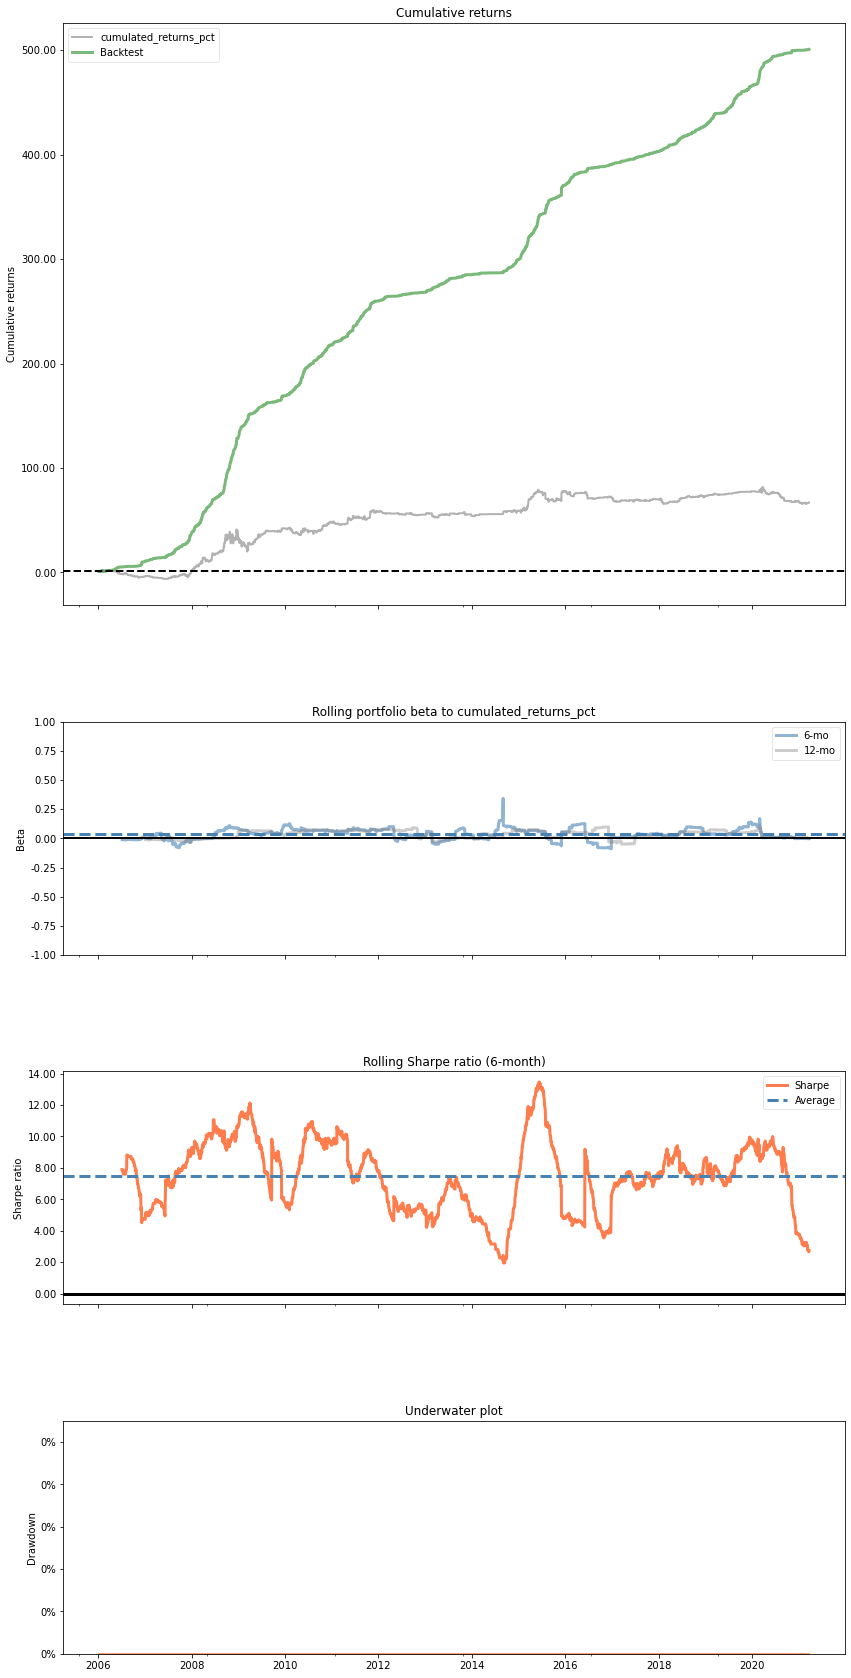

In [39]:
pyfolio.create_simple_tear_sheet(currency1_returns_pred.cumulated_returns_pct, benchmark_rets=currency1_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-23
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Backtest
Annual return          32.0%
Cumulative returns   6601.2%
Annual volatility     129.5%
Sharpe ratio            0.26
Calmar ratio            0.08
Stability                NaN
Max drawdown         -391.4%
Omega ratio             1.23
Sortino ratio           0.34
Skew                  -12.63
Kurtosis              605.32
Tail ratio              1.39
Daily value at risk   -16.2%
Alpha                    0.0
Beta                     1.0

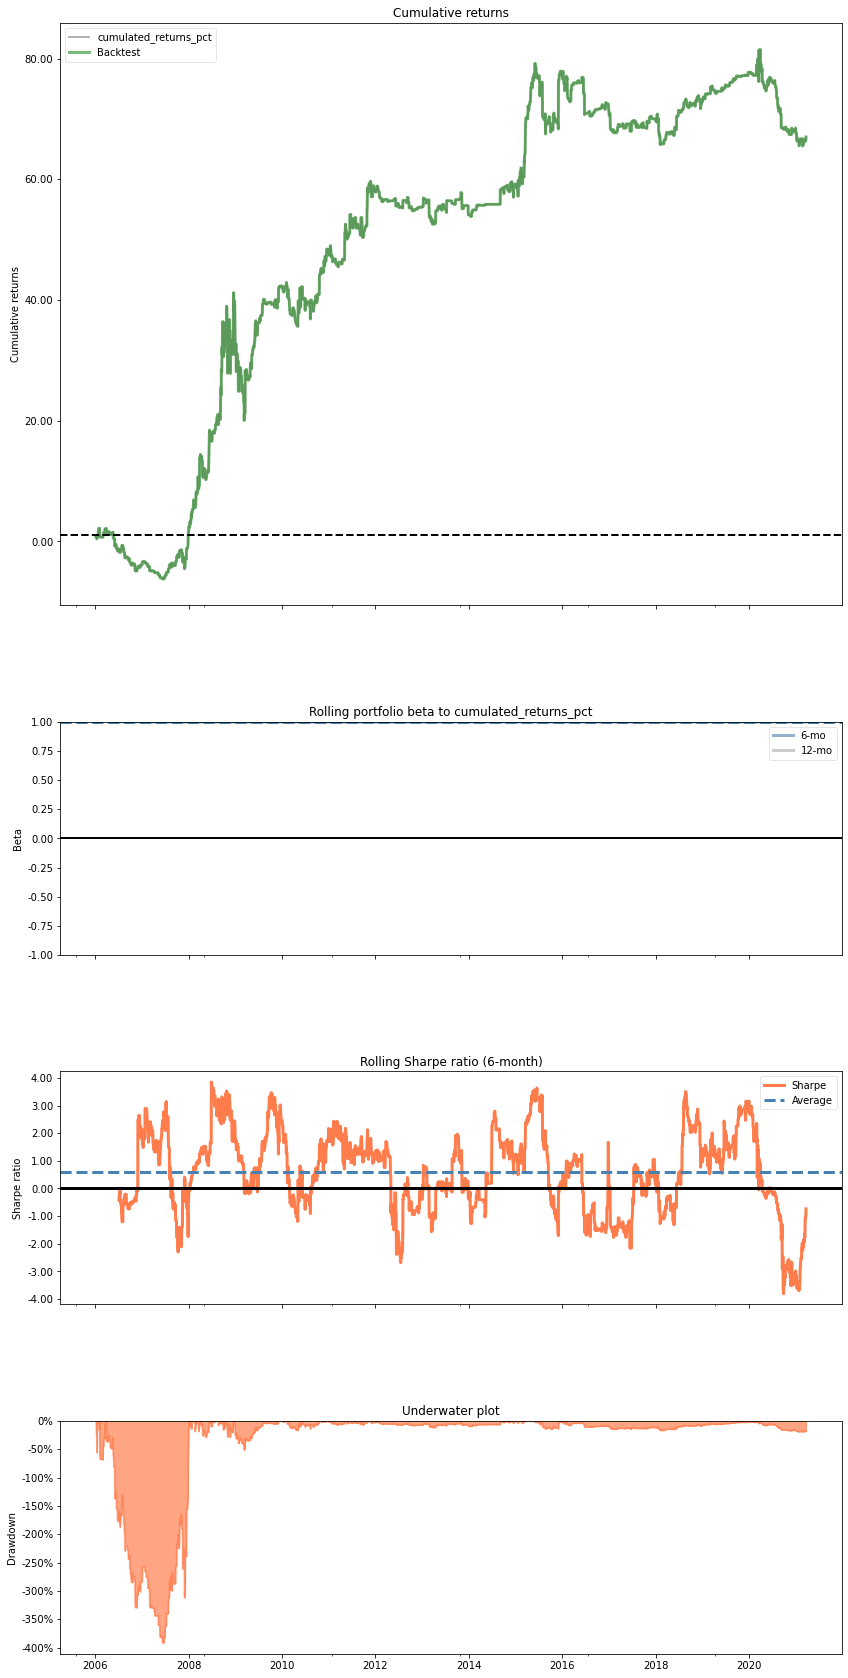

In [71]:
pyfolio.create_simple_tear_sheet(currency1_returns.cumulated_returns_pct, benchmark_rets=currency1_returns.cumulated_returns_pct)


# Currency2 Tear Sheet

In [40]:
currency2_indicators_filename = 'Data/ml_currency2_indicators.pkl'
currency2_train_filename = 'Data/train_currency2_prediction.pkl'
currency2_test_filename = 'Data/test_currency2_prediction.pkl'

currency2_returns, currency2_returns_pred = get_returns(currency2_indicators_filename, currency2_train_filename, currency2_test_filename)


In [41]:
currency2_pred_sharpe_ratio = currency2_returns_pred.cumulated_returns_pct.mean() / currency2_returns_pred.cumulated_returns_pct.std()
annualised_currency2_pred_sharpe_ratio = 252**0.5 * currency2_pred_sharpe_ratio

currency2_sharpe_ratio = currency2_returns.cumulated_returns_pct.mean() / currency2_returns.cumulated_returns_pct.std()
annualised_currency2_sharpe_ratio = 252**0.5 * currency2_sharpe_ratio


In [42]:
print('currency1_sharpe_ratio:\n{}'.format(currency2_sharpe_ratio))
print('currency2_pred_sharpe_ratio:\n{}\n'.format(currency2_pred_sharpe_ratio))

print('annualised_currency2_sharpe_ratio:\n{}'.format(annualised_currency2_sharpe_ratio))
print('annualised_currency2_pred_sharpe_ratio:\n{}'.format(annualised_currency2_pred_sharpe_ratio))


currency1_sharpe_ratio:
0.012002560222753856
currency2_pred_sharpe_ratio:
0.13118733529213722

annualised_currency2_sharpe_ratio:
0.19053473667289633
annualised_currency2_pred_sharpe_ratio:
2.0825343860654524


Entire data start date: 2006-01-04
Entire data end date: 2021-03-12
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           48.8%
Cumulative returns   40230.9%
Annual volatility       19.9%
Sharpe ratio             2.08
Calmar ratio              NaN
Stability                0.62
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    27.23
Kurtosis              1033.83
Tail ratio                inf
Daily value at risk     -2.3%
Alpha                     0.5
Beta                      0.0

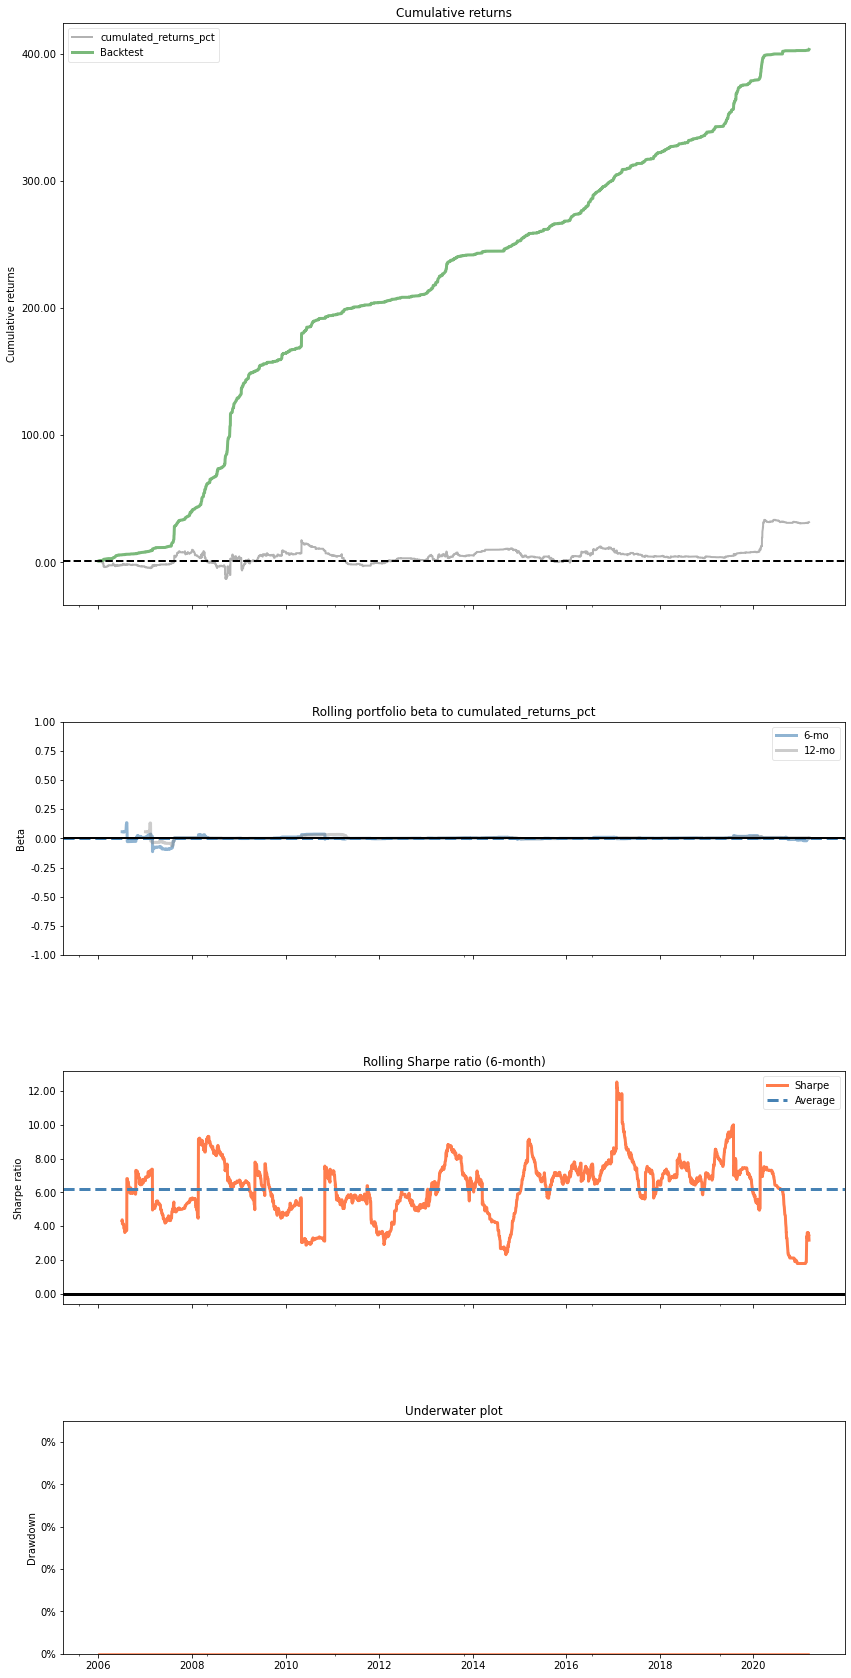

In [43]:
pyfolio.create_simple_tear_sheet(currency2_returns_pred.cumulated_returns_pct, benchmark_rets=currency2_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-12
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Backtest
Annual return          25.7%
Cumulative returns   3064.5%
Annual volatility    1906.3%
Sharpe ratio            0.19
Calmar ratio            0.06
Stability                NaN
Max drawdown         -425.4%
Omega ratio             1.36
Sortino ratio            0.4
Skew                   21.76
Kurtosis              943.07
Tail ratio              1.05
Daily value at risk  -238.7%
Alpha                    0.0
Beta                     1.0

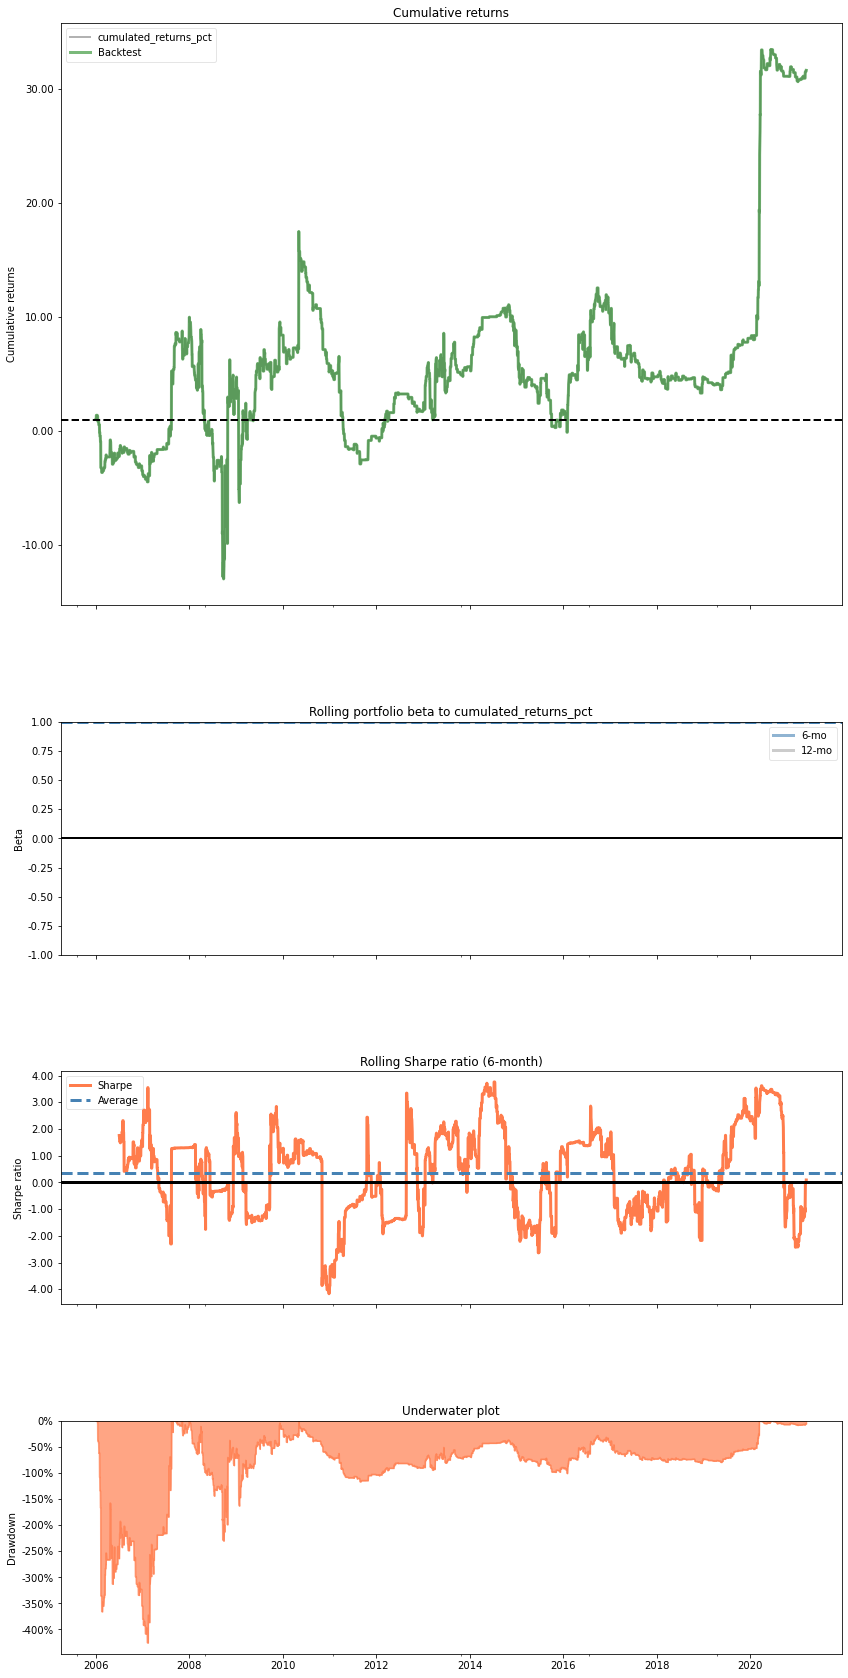

In [70]:
pyfolio.create_simple_tear_sheet(currency2_returns.cumulated_returns_pct, benchmark_rets=currency2_returns.cumulated_returns_pct)


# Stock1 Tear Sheet

In [44]:
stock1_indicators_filename = 'Data/ml_stock1_indicators.pkl'
stock1_train_filename = 'Data/train_stock1_prediction.pkl'
stock1_test_filename = 'Data/test_stock1_prediction.pkl'

stock1_returns, stock1_returns_pred = get_returns(stock1_indicators_filename, stock1_train_filename, stock1_test_filename)


In [45]:
stock1_pred_sharpe_ratio = stock1_returns_pred.cumulated_returns_pct.mean() / stock1_returns_pred.cumulated_returns_pct.std()
annualised_stock1_pred_sharpe_ratio = 252**0.5 * stock1_pred_sharpe_ratio

stock1_sharpe_ratio = stock1_returns.cumulated_returns_pct.mean() / stock1_returns.cumulated_returns_pct.std()
annualised_stock1_sharpe_ratio = 252**0.5 * stock1_sharpe_ratio


In [46]:
print('stock1_sharpe_ratio:\n{}'.format(stock1_sharpe_ratio))
print('stock1_pred_sharpe_ratio:\n{}\n'.format(stock1_pred_sharpe_ratio))

print('annualised_stock1_sharpe_ratio:\n{}'.format(annualised_stock1_sharpe_ratio))
print('annualised_stock1_pred_sharpe_ratio:\n{}'.format(annualised_stock1_pred_sharpe_ratio))


stock1_sharpe_ratio:
0.050070526350355596
stock1_pred_sharpe_ratio:
0.11798648852584481

annualised_stock1_sharpe_ratio:
0.7948449644228848
annualised_stock1_pred_sharpe_ratio:
1.8729774402309671


Entire data start date: 2006-01-04
Entire data end date: 2021-03-08
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           47.8%
Cumulative returns   36167.7%
Annual volatility       21.9%
Sharpe ratio             1.87
Calmar ratio              NaN
Stability                0.76
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    29.73
Kurtosis              1216.38
Tail ratio                inf
Daily value at risk     -2.6%
Alpha                    0.48
Beta                     0.04

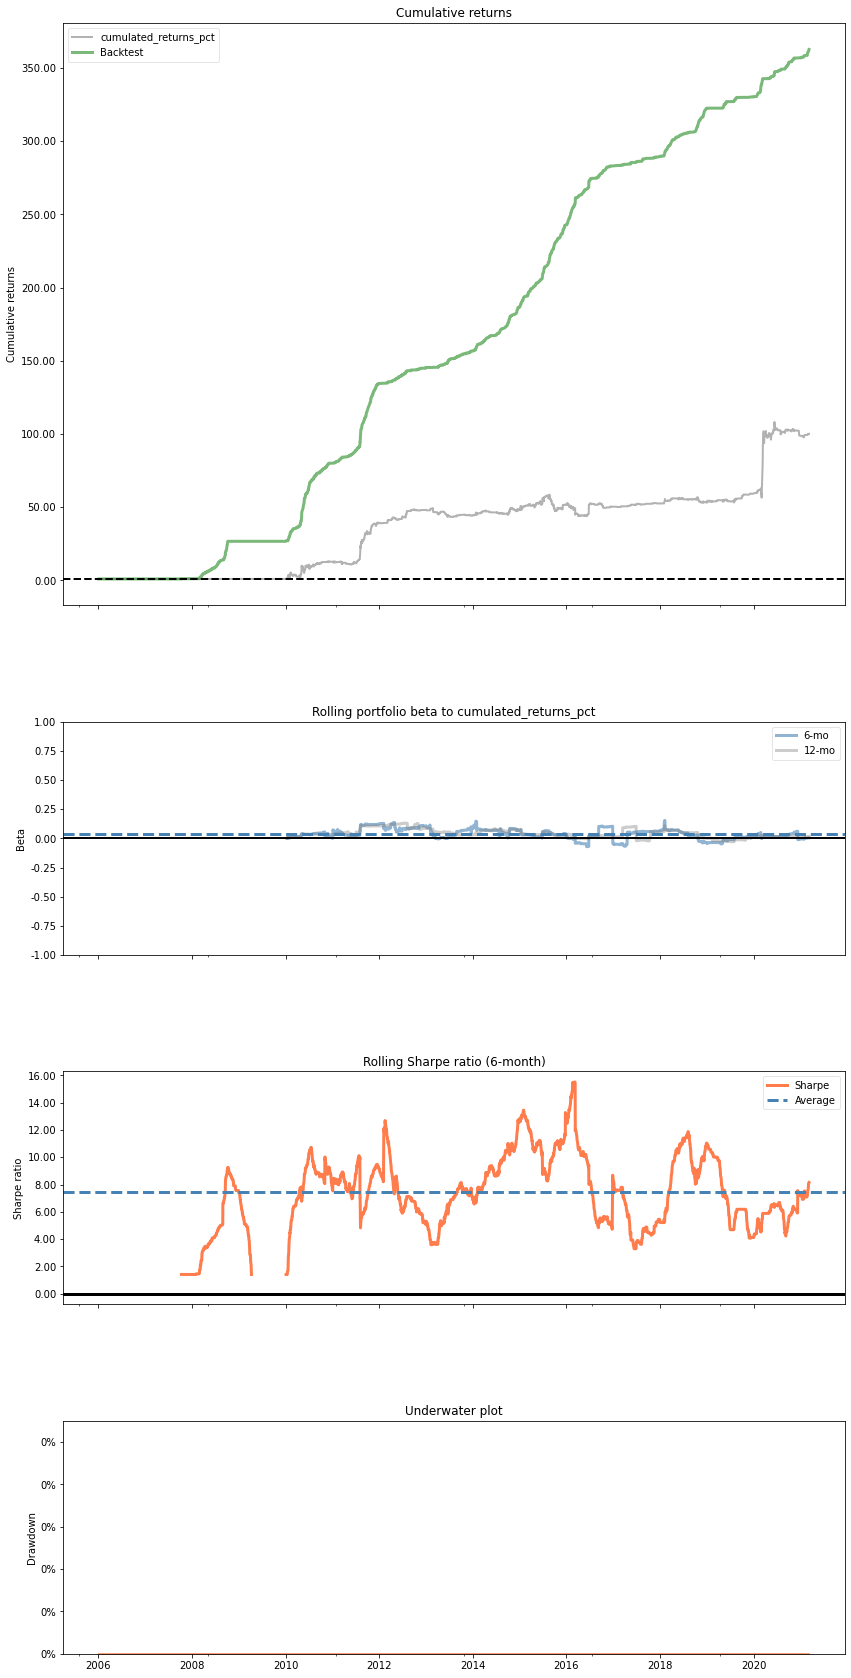

In [47]:
pyfolio.create_simple_tear_sheet(stock1_returns_pred.cumulated_returns_pct, benchmark_rets=stock1_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-08
Backtest months: 181


Backtest
Annual return          35.7%
Cumulative returns   9915.8%
Annual volatility      53.2%
Sharpe ratio            0.79
Calmar ratio            0.59
Stability               0.78
Max drawdown          -60.3%
Omega ratio             1.88
Sortino ratio           1.88
Skew                   12.25
Kurtosis              287.02
Tail ratio              1.66
Daily value at risk    -6.5%
Alpha                    0.0
Beta                     1.0

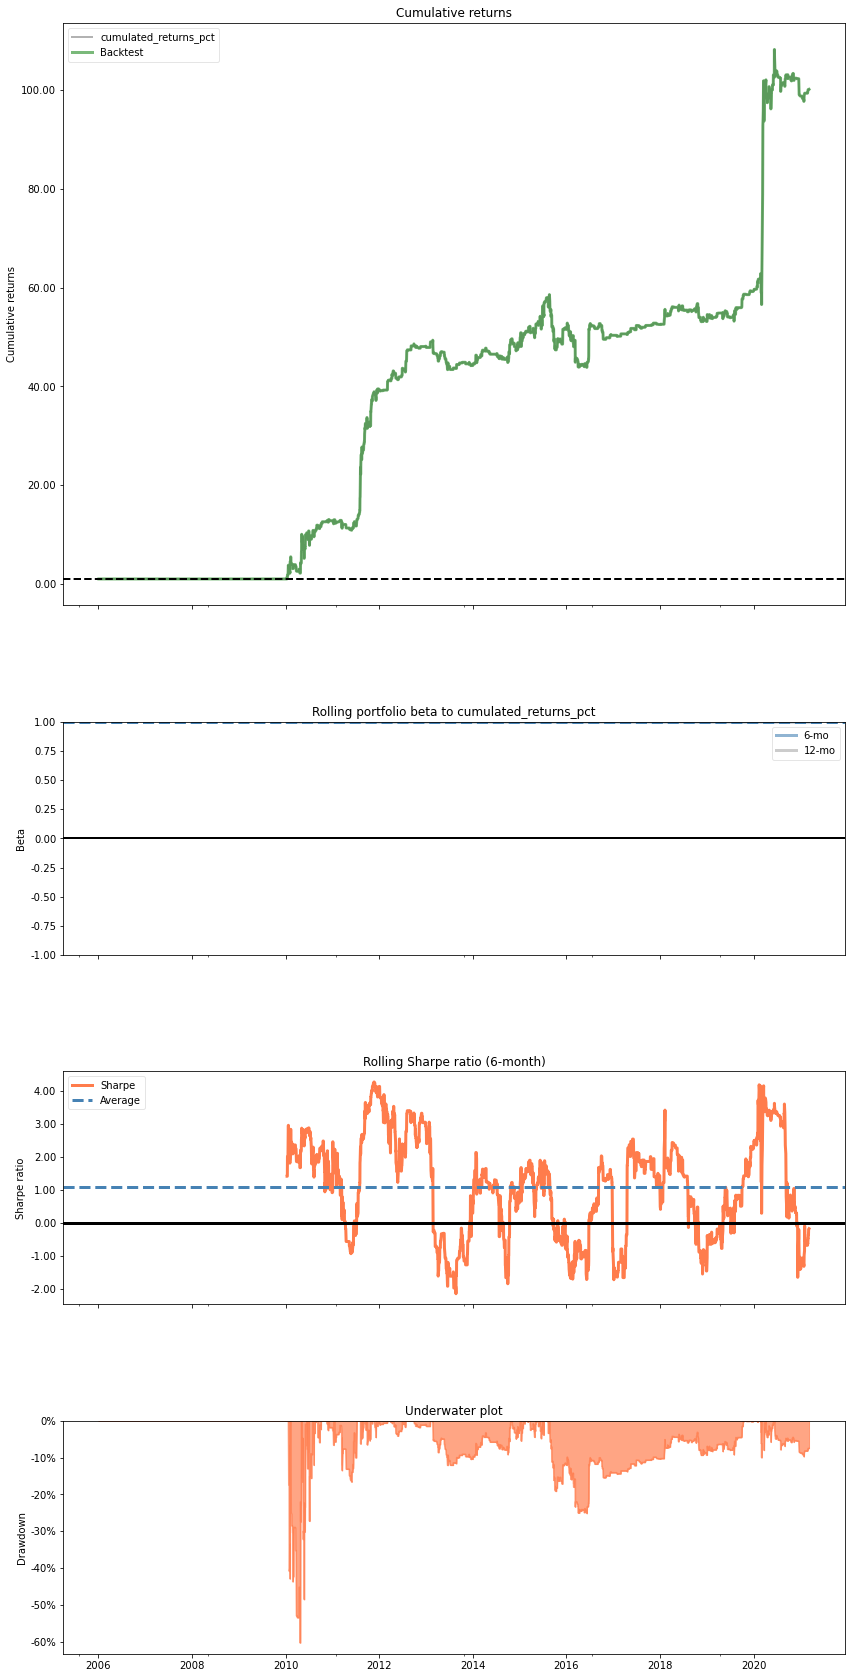

In [69]:
pyfolio.create_simple_tear_sheet(stock1_returns.cumulated_returns_pct, benchmark_rets=stock1_returns.cumulated_returns_pct)


# Stock2 Tear Sheet

In [48]:
stock2_indicators_filename = 'Data/ml_stock2_indicators.pkl'
stock2_train_filename = 'Data/train_stock2_prediction.pkl'
stock2_test_filename = 'Data/test_stock2_prediction.pkl'

stock2_returns, stock2_returns_pred = get_returns(stock2_indicators_filename, stock2_train_filename, stock2_test_filename)


In [49]:
stock2_pred_sharpe_ratio = stock2_returns_pred.cumulated_returns_pct.mean() / stock2_returns_pred.cumulated_returns_pct.std()
annualised_stock2_pred_sharpe_ratio = 252**0.5 * stock2_pred_sharpe_ratio

stock2_sharpe_ratio = stock2_returns.cumulated_returns_pct.mean() / stock2_returns.cumulated_returns_pct.std()
annualised_stock2_sharpe_ratio = 252**0.5 * stock2_sharpe_ratio


In [50]:
print('stock2_sharpe_ratio:\n{}'.format(stock2_sharpe_ratio))
print('stock2_pred_sharpe_ratio:\n{}\n'.format(stock2_pred_sharpe_ratio))

print('annualised_stock2_sharpe_ratio:\n{}'.format(annualised_stock2_sharpe_ratio))
print('annualised_stock2_pred_sharpe_ratio:\n{}'.format(annualised_stock2_pred_sharpe_ratio))


stock2_sharpe_ratio:
0.0673438885038385
stock2_pred_sharpe_ratio:
0.1046488025200714

annualised_stock2_sharpe_ratio:
1.06905108780731
annualised_stock2_pred_sharpe_ratio:
1.6612482388129102


Entire data start date: 2006-01-04
Entire data end date: 2021-03-11
Backtest months: 181


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           43.9%
Cumulative returns   24232.5%
Annual volatility       23.1%
Sharpe ratio             1.66
Calmar ratio              NaN
Stability                 0.6
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                    47.08
Kurtosis              2599.83
Tail ratio                inf
Daily value at risk     -2.8%
Alpha                     0.3
Beta                     0.33

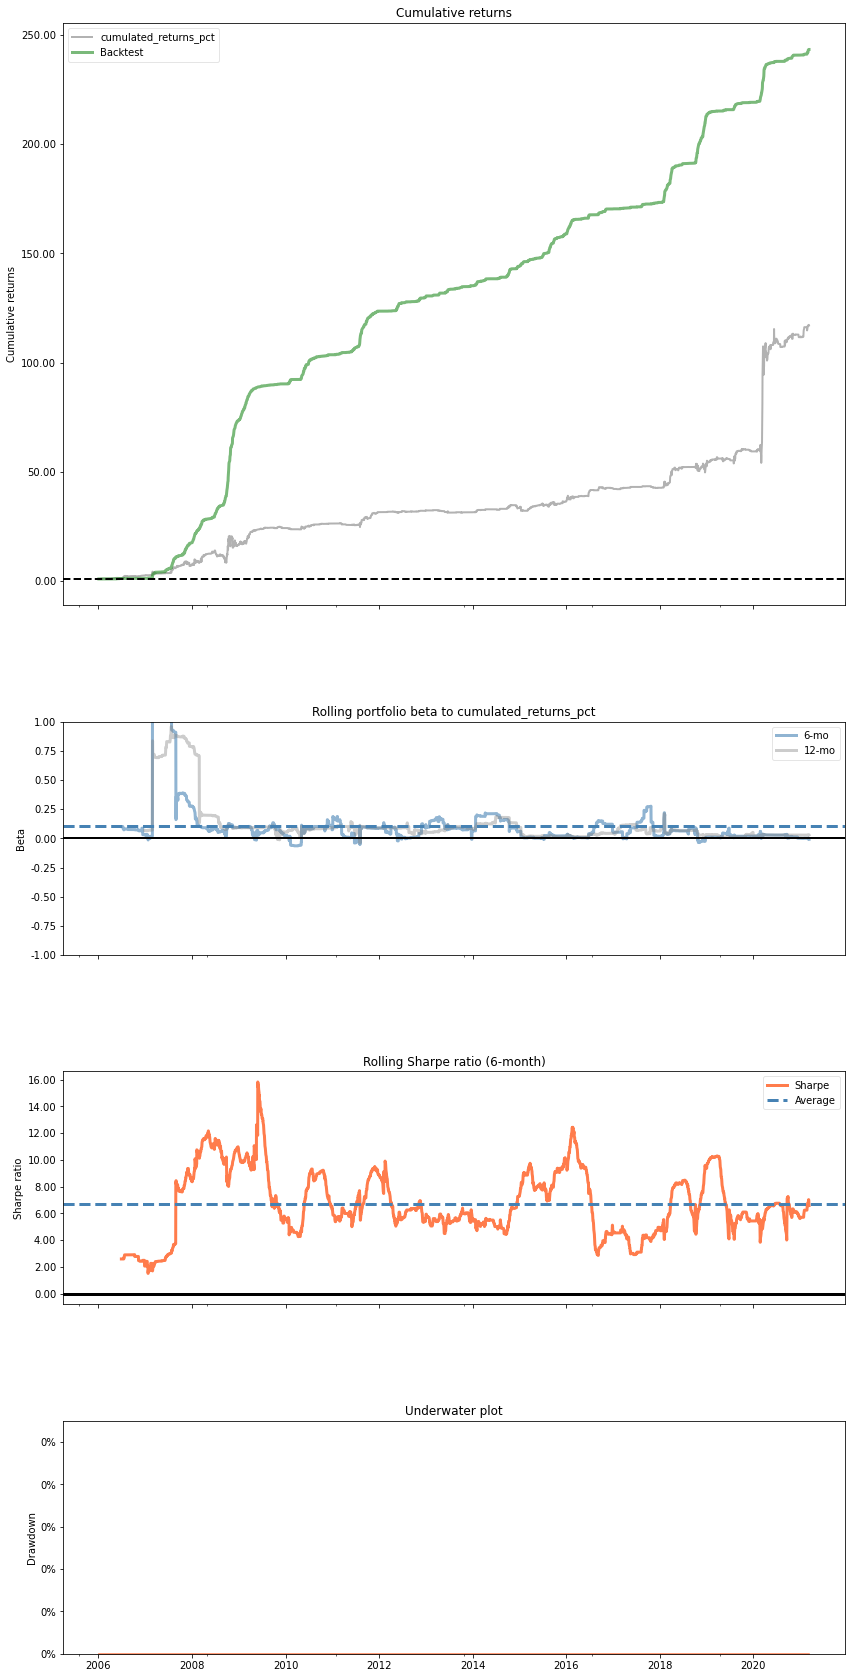

In [51]:
pyfolio.create_simple_tear_sheet(stock2_returns_pred.cumulated_returns_pct, benchmark_rets=stock2_returns.cumulated_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-11
Backtest months: 181


Backtest
Annual return           37.1%
Cumulative returns   11605.5%
Annual volatility       34.7%
Sharpe ratio             1.07
Calmar ratio             0.95
Stability                0.74
Max drawdown           -39.1%
Omega ratio              1.77
Sortino ratio            2.13
Skew                     7.52
Kurtosis               171.89
Tail ratio               1.73
Daily value at risk     -4.2%
Alpha                     0.0
Beta                      1.0

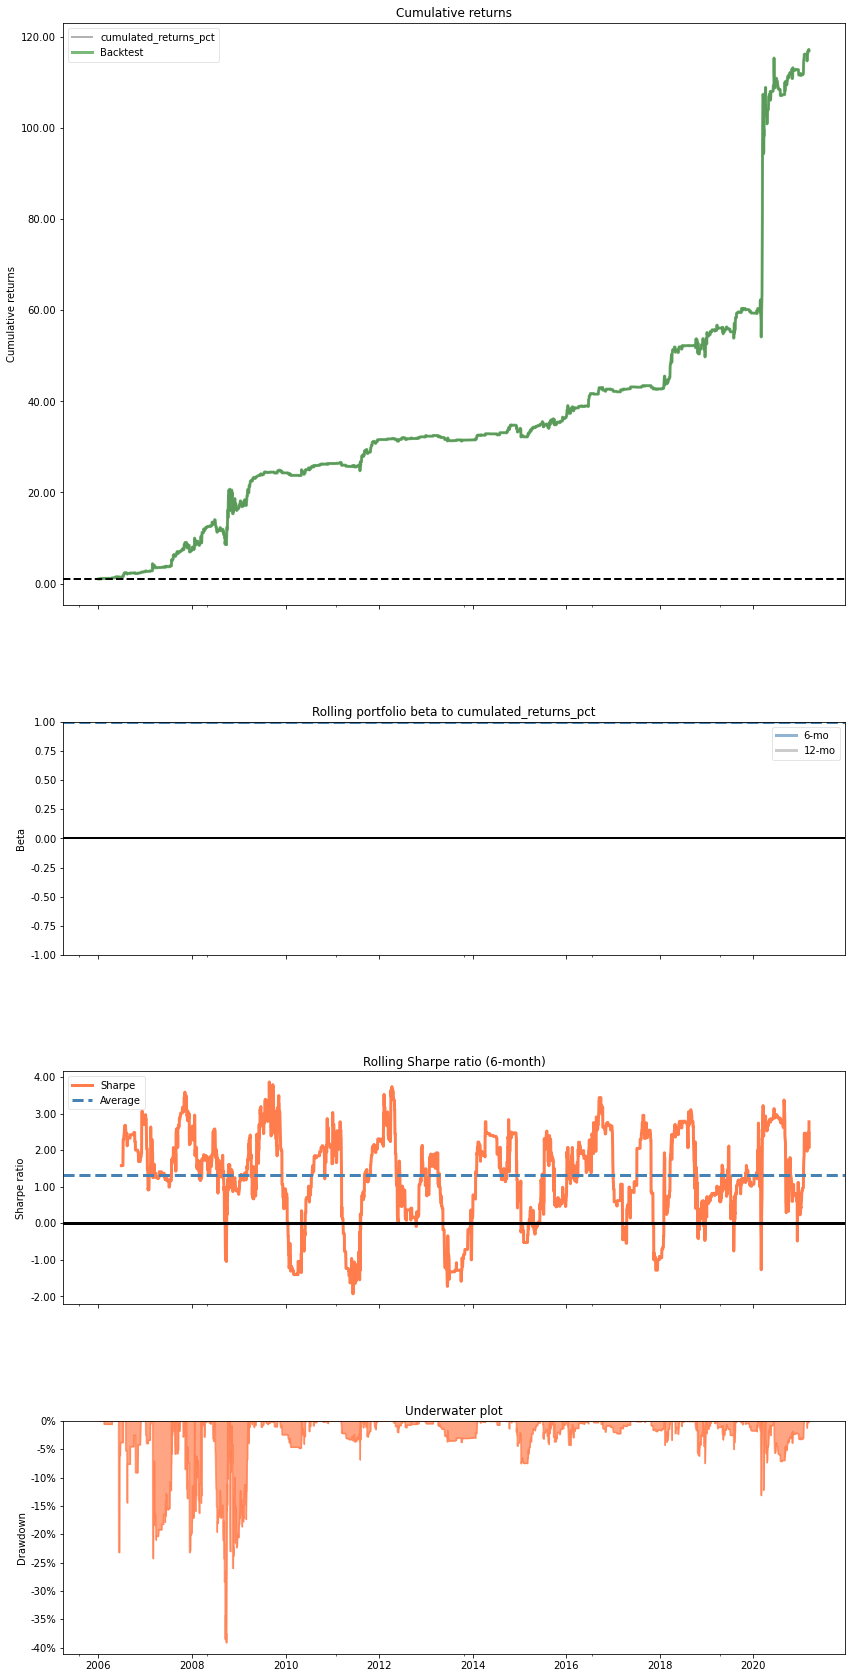

In [68]:
pyfolio.create_simple_tear_sheet(stock2_returns.cumulated_returns_pct, benchmark_rets=stock2_returns.cumulated_returns_pct)


# Portfolio Tear Sheet  
Using equal for all asset types

In [53]:
asset_types = ['bond', 'commodity', 'currency', 'stock']
indicators_filename = 'Data/ml_bond1_indicators.pkl'
indicators = pd.read_pickle(indicators_filename)
benchmark_df = pd.DataFrame(index=indicators.date)
predicted_df = pd.DataFrame(index=indicators.date)
column_names = []
benchmark_returns = {}
predicted_returns = {}
for asset_type in asset_types:
    for i in range(1, 3):
        indicators_filename = os.path.join('Data', f'ml_{asset_type}{i}_indicators.pkl')
        train_filename = os.path.join('Data', f'train_{asset_type}{i}_prediction.pkl')
        test_filename = os.path.join('Data', f'test_{asset_type}{i}_prediction.pkl')
        returns, returns_pred = get_returns(indicators_filename, train_filename, test_filename)
        benchmark_returns[f'{asset_type}{i}'] = returns
        predicted_returns[f'{asset_type}{i}'] = returns_pred
        column_names.append(f'{asset_type}{i}_cumulated_returns')
        benchmark_df = benchmark_df.merge(returns.cumulated_returns, how='outer', left_index=True, right_index=True)
        predicted_df = predicted_df.merge(returns_pred.cumulated_returns, how='outer', left_index=True, right_index=True)
benchmark_df.columns = column_names
predicted_df.columns = column_names
benchmark_df = benchmark_df.ffill()
predicted_df = predicted_df.ffill()

benchmark_df['total_returns'] = benchmark_df.sum(axis=1)
benchmark_df['adj_total_returns'] = benchmark_df['total_returns'] / benchmark_df.iloc[0]['total_returns']
benchmark_df['adj_total_returns_pct'] = benchmark_df['adj_total_returns'].pct_change(1).fillna(0.0)

predicted_df['total_returns'] = predicted_df.sum(axis=1)
predicted_df['adj_total_returns'] = predicted_df['total_returns'] / predicted_df.iloc[0]['total_returns']
predicted_df['adj_total_returns_pct'] = predicted_df['adj_total_returns'].pct_change(1).fillna(0.0)

In [65]:
portfolio_pred_sharpe_ratio = predicted_df.adj_total_returns_pct.mean() / predicted_df.adj_total_returns_pct.std()
annualised_portfolio_pred_sharpe_ratio = 252**0.5 * portfolio_pred_sharpe_ratio

portfolio_sharpe_ratio = benchmark_df.adj_total_returns_pct.mean() / benchmark_df.adj_total_returns_pct.std()
annualised_portfolio_sharpe_ratio = 252**0.5 * portfolio_sharpe_ratio


In [66]:
print('portfolio_sharpe_ratio:\n{}'.format(portfolio_sharpe_ratio))
print('portfolio_pred_sharpe_ratio:\n{}\n'.format(portfolio_pred_sharpe_ratio))

print('annualised_portfolio_sharpe_ratio:\n{}'.format(annualised_portfolio_sharpe_ratio))
print('annualised_portfolio_pred_sharpe_ratio:\n{}'.format(annualised_portfolio_pred_sharpe_ratio))


portfolio_sharpe_ratio:
0.06253320694306526
portfolio_pred_sharpe_ratio:
0.36260730332196794

annualised_portfolio_sharpe_ratio:
0.9926838855281297
annualised_portfolio_pred_sharpe_ratio:
5.756212488994154


Entire data start date: 2006-01-04
Entire data end date: 2021-03-24
Backtest months: 184


/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/stevenbattilana/opt/anaconda3/envs/algothon21/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Backtest
Annual return           47.8%
Cumulative returns   40258.8%
Annual volatility        6.8%
Sharpe ratio             5.76
Calmar ratio              NaN
Stability                0.69
Max drawdown             0.0%
Omega ratio               NaN
Sortino ratio             inf
Skew                      9.1
Kurtosis               146.63
Tail ratio                inf
Daily value at risk     -0.7%
Alpha                    0.45
Beta                     0.06

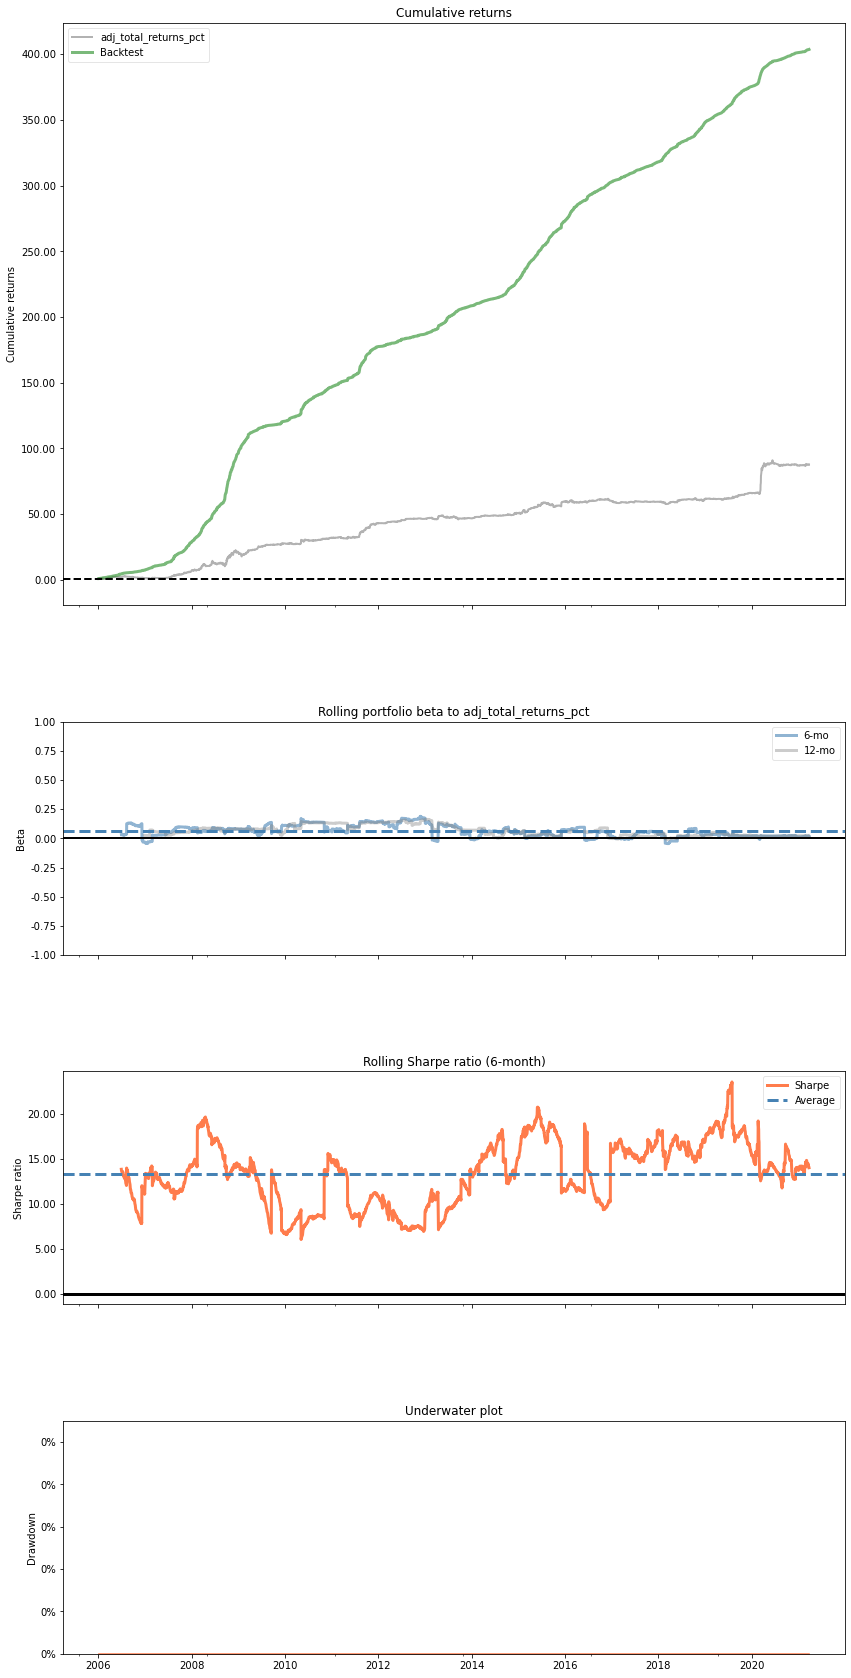

In [57]:
benchmark_df = benchmark_df[~benchmark_df.index.duplicated(keep='first')]
pyfolio.create_simple_tear_sheet(predicted_df.adj_total_returns_pct, benchmark_rets=benchmark_df.adj_total_returns_pct)


Entire data start date: 2006-01-04
Entire data end date: 2021-03-24
Backtest months: 184


Backtest
Annual return          33.9%
Cumulative returns   8686.3%
Annual volatility      35.4%
Sharpe ratio            0.99
Calmar ratio            0.51
Stability               0.68
Max drawdown          -66.7%
Omega ratio             1.49
Sortino ratio           1.75
Skew                    4.46
Kurtosis              116.61
Tail ratio              1.56
Daily value at risk    -4.3%
Alpha                    0.0
Beta                     1.0

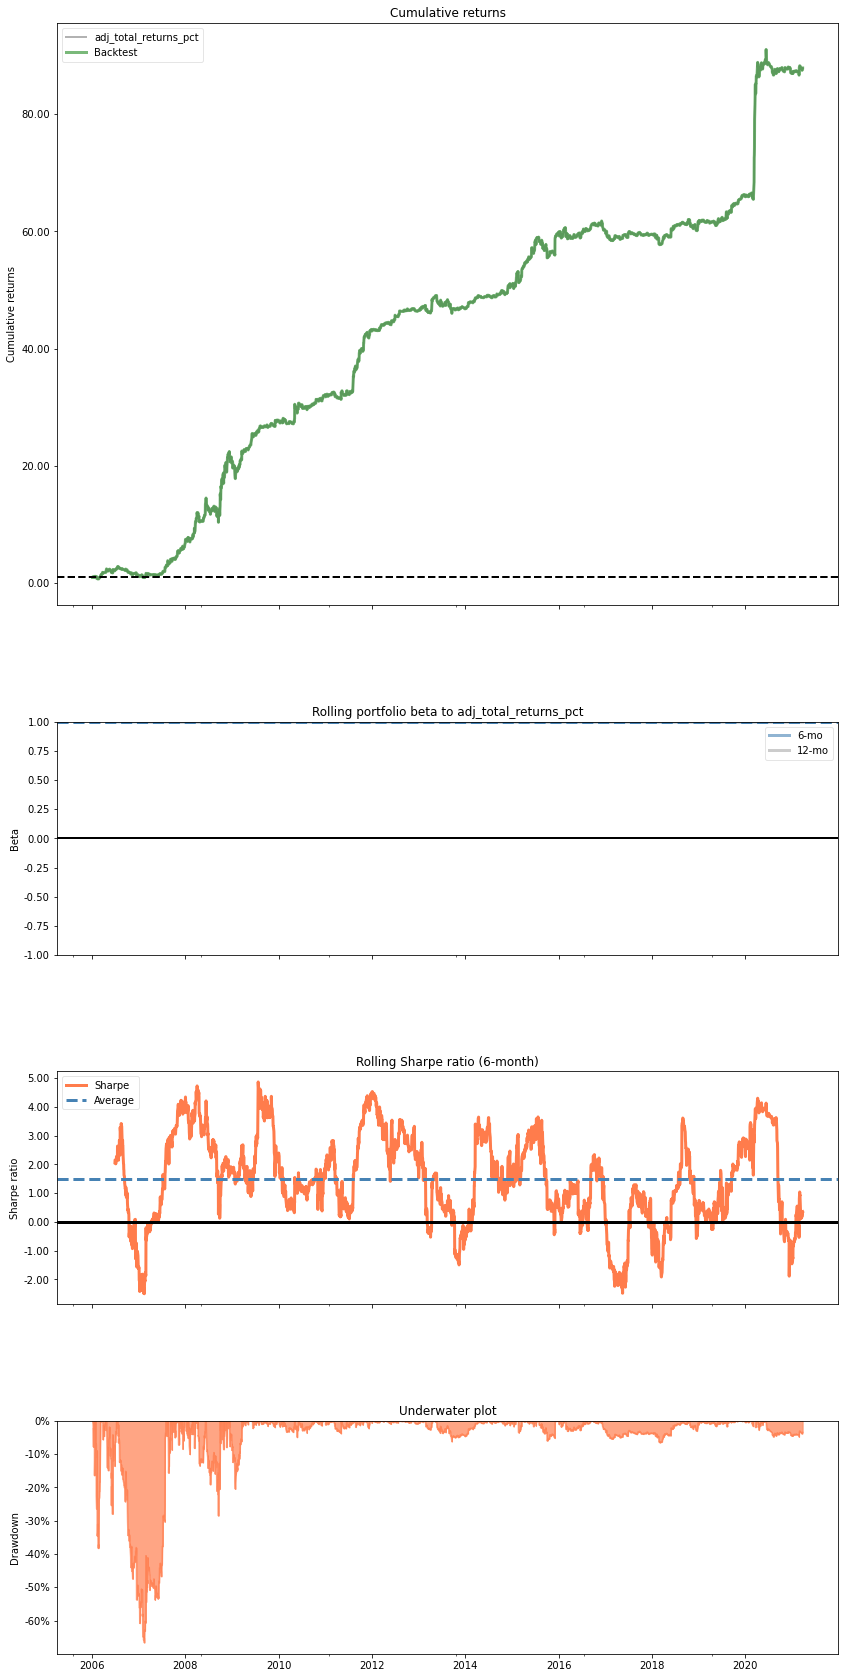

In [67]:
pyfolio.create_simple_tear_sheet(benchmark_df.adj_total_returns_pct, benchmark_rets=benchmark_df.adj_total_returns_pct)
